## 1. Problem Statement: Create a Machine Learning model using various Classification models to predict rainfall.

1. Your views about the problem statement?

'The Weather Oracle' is a column in The Daily Buzz newspaper. The column included weather prediction for the week ahead, including temperature, humidity and chances of precipitation. They have a group of experienced meterioligists to work on this new column. With the existing data a Machine Learning model can easily predict the Rainfall. Once model is taught on a training dataset it can be used for future predictions. In this way the Daily Buzz can increase their popularity along with more accuracy in weather predictions. Classification models such as Decision Tree classifiers and ensemble models are useful in predicting the weather. Weather prediction can be done after analyzing various factors like temperature, sunshine, rainfall of current day, humidity, fraction of sky obscured by clouds. These are all very sensitive data and with the help of materiologists the team can ensure the data collected is correct and can be used for correct prediction.


2. What will be your approach to solving this task?

This is a classification problem. The target is to find an algorithm which is able to give out correct classification as 0 (no rain) and 1 (chance of rain). 80% of dataset can be used for Training the model and 20% can be used for Testing. Accuracy score, Confusion matrix and ROC-AUC curve are some of the performance metrics with which we can analyze the performance of the algorithm. Prior to apply various algorithms, dataset needs to be cleaned. Below steps needs to be done:-
- Check the presence of missing values
- Analyze and impute the missing values appropriately
- Check the presence of outliers
- Ensemble models are less affected by outliers, then also same can be treated
- Outlier treatment is done so that missing values can be imputed with mean value
- Check the categorical columns and convert the same to equivalent numerical values since ML algorithms work well with numerical data
- Do the univariate, bivariate analysis of variables to check the relationship between the independent and dependent variables
- Check the correlation matrix and analyze the correlation
- Drop irrelevant columns. Columns with less fill rate, with a single unique value which does not contribute in prediction can be dropped
- Split the dataset into independent and dependent data
- Create train and test models
- Modeling

3. What were the available ML model options you had to perform this task?

There are various classification techniques available. The dataset has 3337 observations and 17 columns. Models used are:
i. K-Nearest Neighbor
ii. Decision Tree Classifier
iii. Bagging Classifier
iv. Random Forest Classifier
v. Adaptive Boosting
vi. Extreme Gradient Boosting
vii. Extreme Gradient Boosting Random Forest classifier

Hyper paramter tuned Decision tree provided a model with good accuracy score of 0.837 and 0.835 on Training and Testing set respectively. Ensemble techniques like Bagging, Boosting and Random Forest were tried in order to see whether those models can provide even better accuracy on Test data. Ensemble models with no hyper tuned parameters gave an overfit model. But after training with hyper parameters all of them gave a good fit model.

4. Which model’s performance is best and what could be the possible reason for that?

Random Forest Classifier gave and accuracy score of 0.842 on Training set and .835 on Test set. This means model was able to predict around 84% of data accurately. AUC score of RandomForest came out to be 0.88 which is the highest among all the other models. KNN, Decision Tree gave a good performance but AUC score was low compared to Random Forest. Boosting and Bagging techniques on Decision Tree and RandomForest did not improve the performance. This may be because dataset is of small size. Analyzing the feature importance feature 'Humidity3pm' has a major role in predicting the Rainfall. This was highlighted by Decision Tree, Random Forest and XGBoost. Temperature, Sunshine, Rainfall were some of the relevant features in prediction.

5. What steps can you take to improve this selected model’s performance even further?

- Common parameters are employed for hyperparameter tuning, but there are additional parameters that, when used correctly, may enhance performance even further.
- Cross validation method can be implemented
- Other than deleting the Date feature, i have maintained the Year and Month as separate variables. These features were not showing much of an importance in prediction. Hence modeling after deleting the Date may give another score.
- Certain features were giving high multicollinearity. Proceeded with the dataset as it is since target was prediction. Analyzing and dropping irrelevant features may give a better performance.
- Feature engineering can be implemented

In [127]:
# importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## 2. Data Source

In [3]:
# Read the excel file
df= pd.read_excel('sydney_rain prediction.xlsx', sheet_name= 'Sheet1')

# First 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [72]:
# Last 5 rows
df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0,2017,6
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0,2017,6
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0,2017,6
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0,2017,6
3336,7.6,19.3,0.0,3.4,9.4,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0,2017,6


In [5]:
# Dataset detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [6]:
# Dataset information
print('Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataset has 3337 rows and 17 columns


In [7]:
# Missing value detail

df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

<AxesSubplot: >

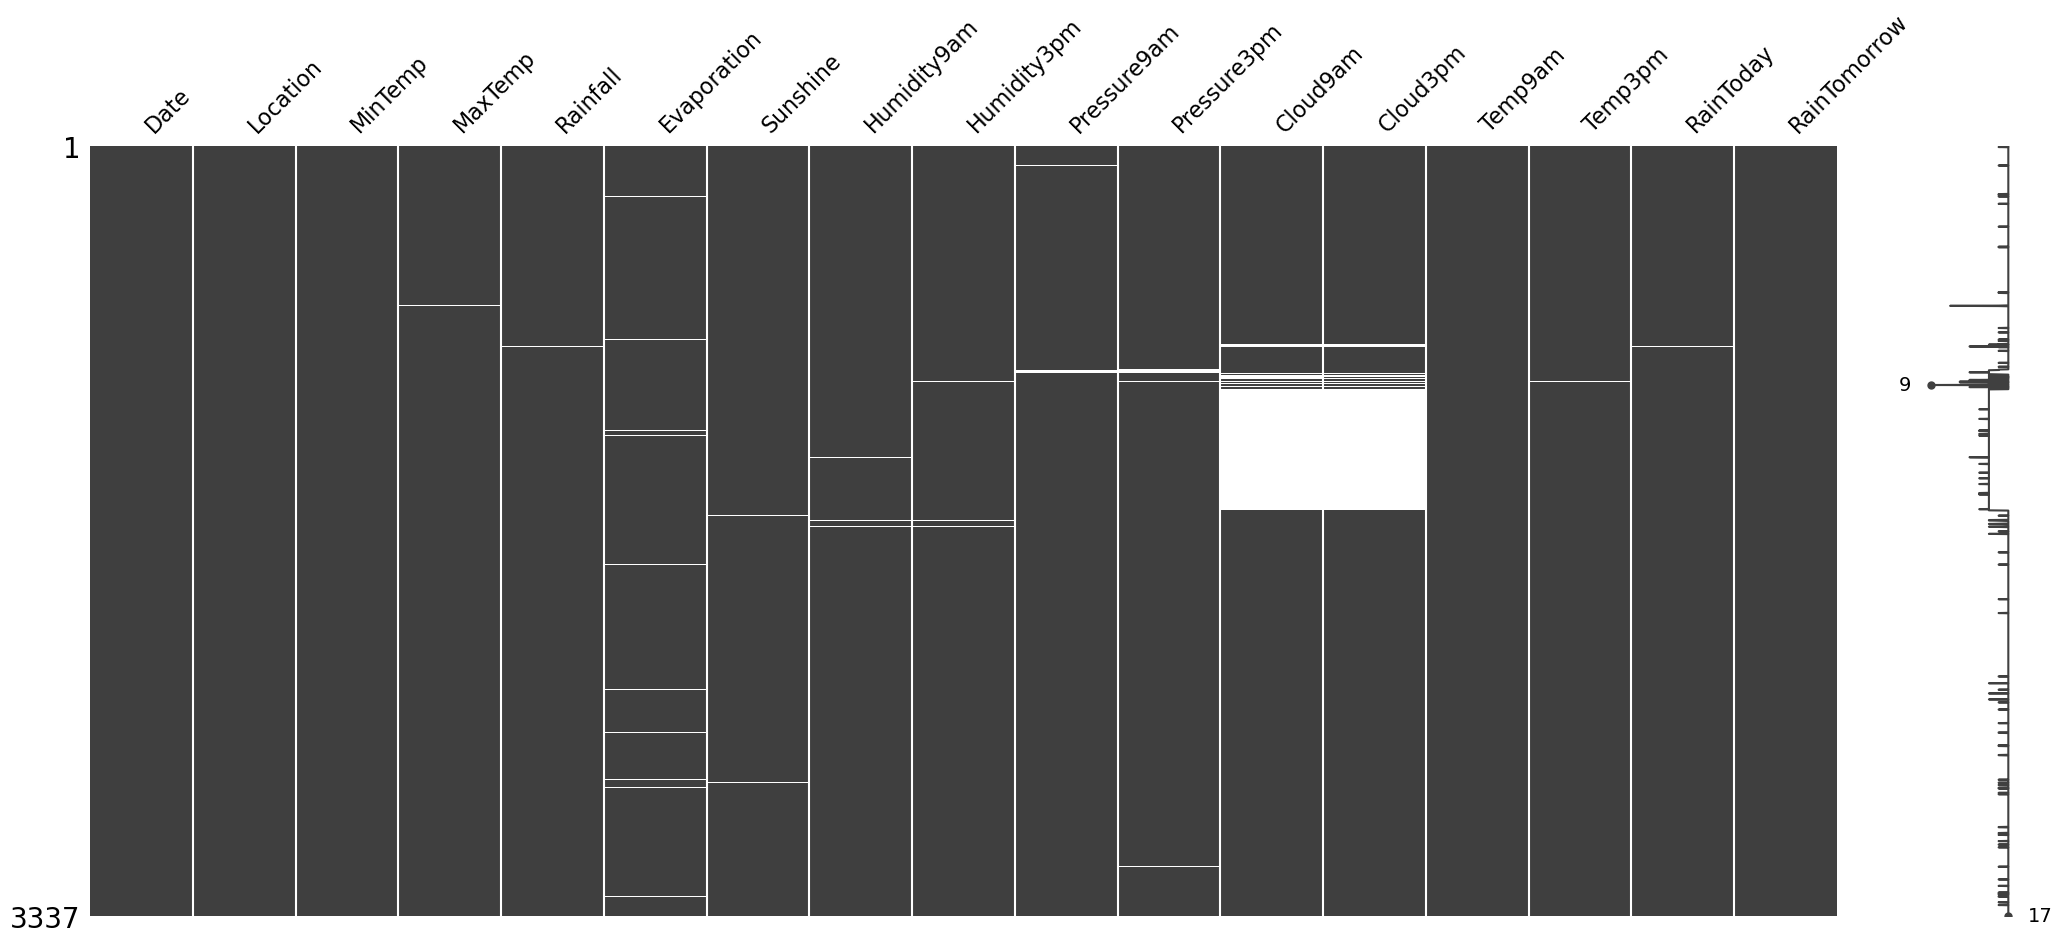

In [8]:
import missingno
missingno.matrix(df)

In [9]:
print('Dataset has data from {} till {}'.format(df.Date.min(),df.Date.max()))

Dataset has data from 2008-02-01 00:00:00 till 2017-06-25 00:00:00


##### Insights

- Dataset has 3337 rows and 17 columns.
- Features except Date, Location and RainTomorrow has missing values.
- Features Cloud9am and Cloud3pm have maximum number of missing values and it is displayed as a white box in the missingno matrix.
- The provided data is from the year 2008 to 2017.
- Dependent variable is RainTomorrow and rest are the Independent variables.

## 3. Extended Data Dictionary

In [10]:
# Extended Data Dictionary

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [11]:
df.describe(include= ['object'])

,Location,RainToday,RainTomorrow
count,3337,3331,3337
unique,1,2,2
top,Sydney,No,No
freq,3337,2465,2472


## 4. Data Preprocessing

### Feature engineering of Date feature

In [12]:
# Feature engineering of Date feature

df_copy = df.copy()
df.Date.head()

0   2008-02-01
1   2008-02-02
2   2008-02-03
3   2008-02-04
4   2008-02-05
Name: Date, dtype: datetime64[ns]

The 'Date' feature comprises 3337 unique values, potentially leading to an increased dataset cardinality. Considering this, it may be advisable to drop the Date feature. However, before doing so, it is recommended to first split and save the year and month as separate features. This will facilitate further analysis.

In [13]:
import datetime as dt

df['Year']= df.Date.dt.year
df['Month']= df.Date.dt.month

df.drop(columns = ['Date'], inplace= True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008,2
1,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008,2
2,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008,2
3,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008,2
4,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008,2


### Outlier Analysis

In [14]:
df.columns
df_num = df.select_dtypes(include= ['float64'])
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

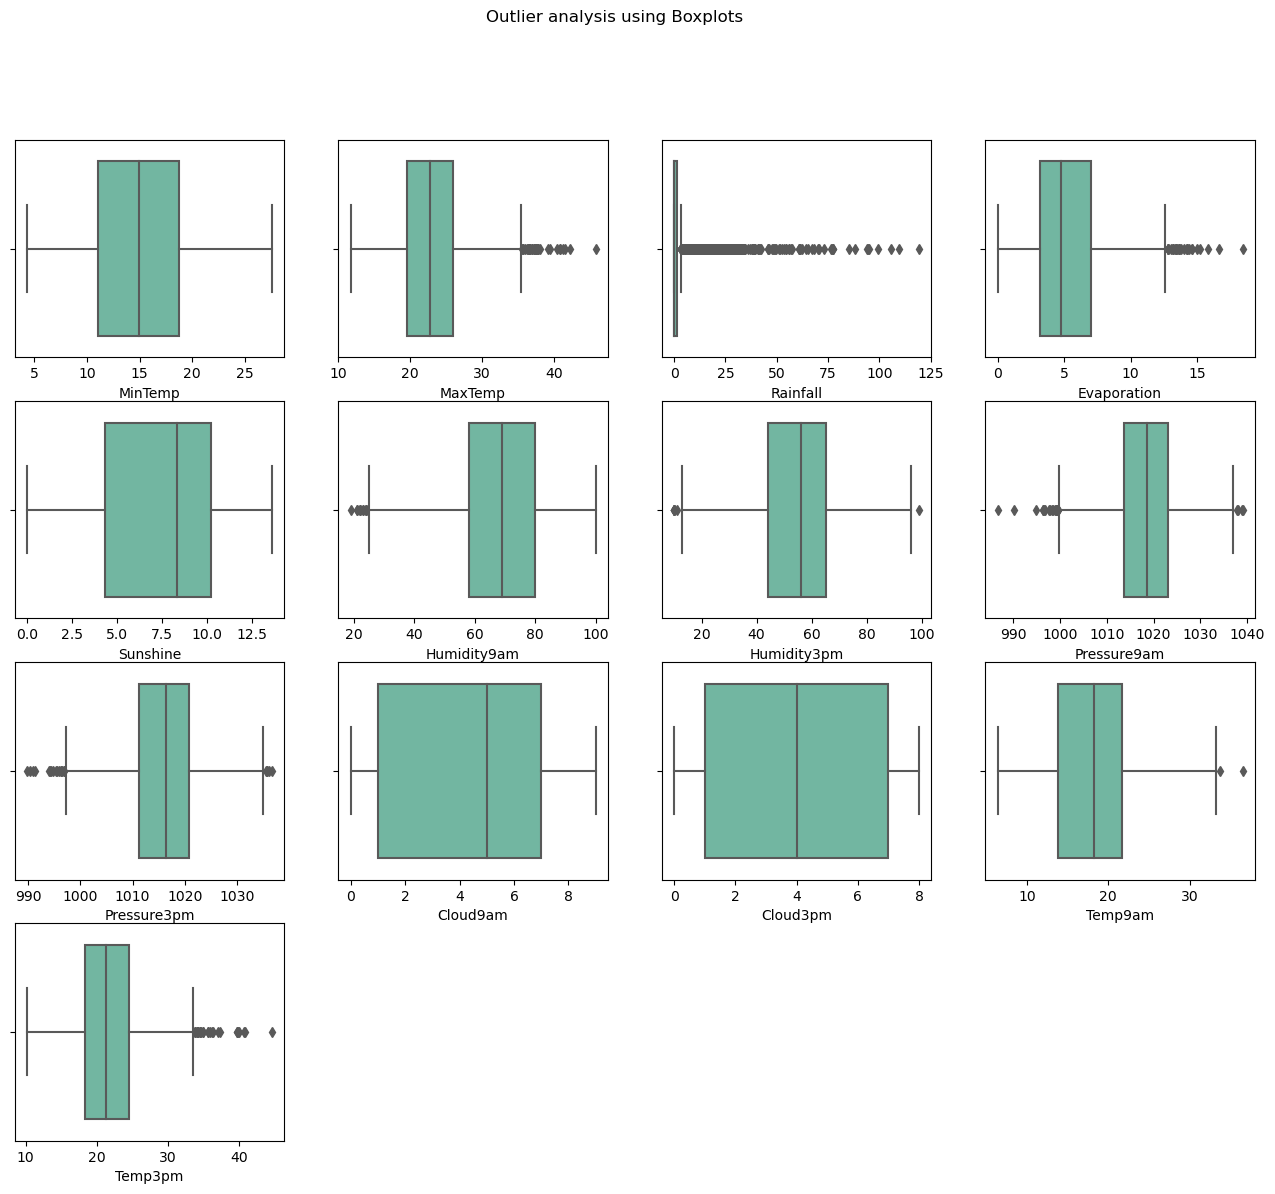

In [15]:
# Outlier analysis using Boxplot

fig, ax = plt.subplots(4, 4, figsize = (16,13))
ax = ax.flatten()

for i, c in enumerate(df_num):
    sns.boxplot(x = df_num[c], ax = ax[i], palette = 'Set2')
plt.delaxes(ax[13])
plt.delaxes(ax[14])
plt.delaxes(ax[15])
plt.suptitle('Outlier analysis using Boxplots', fontsize = 12)
plt.show()

In [16]:
# Function to evaluate lower bound, upper bound and perentage of outlier in each column

def outliers(feature):
    outlier_value = []
    q1, q3= np.nanpercentile(feature, q = [25,75])
    IQR = q3 - q1
    lb = q1 - 1.5*IQR
    ub = q3 + 1.5*IQR
    feature.apply(lambda x: outlier_value.append(x) if ((x>ub) or (x<lb)) else None)
    outlier_percent = len(outlier_value)/df.shape[0] * 100
    return[lb, ub, outlier_percent]

In [17]:
outliers_list = []
feature_list = []
lower_bound_list = []
upper_bound_list = []

for feature in df_num.columns:
    lower_bound_list.append(outliers(df_num[feature])[0])
    upper_bound_list.append(outliers(df_num[feature])[1])
    outliers_list.append(outliers(df_num[feature])[2])
    feature_list.append(feature)

df_outliers = pd.DataFrame({'Lower Fence':lower_bound_list,'Upper Fence':upper_bound_list,
                             '% of Outliers' : outliers_list}, index=feature_list)  
df_outliers.sort_values(by= ['% of Outliers'], ascending= False)

,Lower Fence,Upper Fence,% of Outliers
Rainfall,-2.10,3.50,18.339826
Evaporation,-2.50,12.70,1.048846
MaxTemp,10.00,35.60,1.018879
Temp3pm,9.25,33.65,0.779143
Pressure9am,999.60,1037.20,0.719209
Pressure3pm,997.05,1035.05,0.629308
Humidity9am,25.00,113.00,0.359604
Humidity3pm,12.50,96.50,0.209769
Temp9am,1.95,33.55,0.059934
MinTemp,-0.55,30.25,0.000000


##### Insights

- Box and whisker plot displays the presence of outliers in continuous numerical features
- Rainfall feature has the highest (18.34%) of outliers present
- There are missing values present in numeric columns. Imputing with mean will not be appropriate in case outliers are present. In such cases, outliers need to be treated first

In [18]:
# Function for removing outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    return lower_range, upper_range

In [19]:
for feature in df_num.columns:
    if feature != ['MinTemp', 'Sunshine', 'Cloud9am', 'Cloud3pm']:
        lr,ur= remove_outlier(df[feature])
        df[feature] = np.where(df[feature] > ur, ur, df[feature])
        df[feature] = np.where(df[feature] < lr, lr, df[feature])

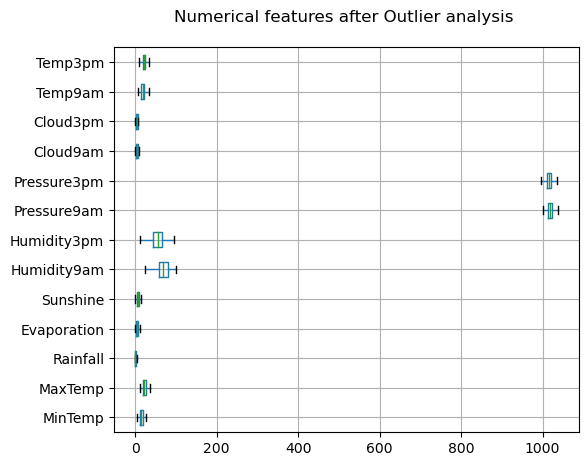

In [20]:
# Dataset after outlier treatment
plt.figure(figsize = (6, 5))
df.boxplot(column= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'], vert = 0)
plt.title('Numerical features after Outlier analysis \n')
plt.show()

### Missing value imputation

In [21]:
# Numerical features
df_num.columns[df_num.isnull().any()]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [22]:
for feature in df_num.columns:
    df[feature].fillna(df[feature].mean(), inplace= True)

In [23]:
df.columns[df.isnull().sum()>0]

Index(['RainToday'], dtype='object')

In [24]:
for feature in df.select_dtypes(include= 'object'):
    mode_val = df[feature].mode()[0]
    df[feature].fillna(mode_val, inplace= True)

In [25]:
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
Year            0
Month           0
dtype: int64

In [26]:
df.RainTomorrow.mode()

0    No
Name: RainTomorrow, dtype: object

In [27]:
df['RainToday'].fillna(df.RainToday.mode(), inplace= True)

In [28]:
df.RainToday.head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: RainToday, dtype: object

##### Insights from missing value treatment

- Missing values in numerical features imputed with mean value
- Missing values in categorical feature imputed with mode

### Categorical feature analysis

In [29]:
for feature in df.select_dtypes(include= 'object'):
    print(df[feature].value_counts())

Sydney    3337
Name: Location, dtype: int64
No     2471
Yes     866
Name: RainToday, dtype: int64
No     2472
Yes     865
Name: RainTomorrow, dtype: int64


In [30]:
round(df.RainTomorrow.value_counts(1)*100, 2)

No     74.08
Yes    25.92
Name: RainTomorrow, dtype: float64

In [31]:
# Location has unique value. This unique feature will be irrelevant to the model's predictive performance and therefore can be dropped.

df.drop(columns= ['Location'], axis= 1, inplace= True)

#### Insights

- There were three categorical features
- Feature, Location dropped
- The dependent variable, RainTomorrow, has approximately 74% of observations as 'No' and 26% as 'Yes.

## 5.Exploratory Data Analysis

### Univariate Analysis

Its the study of single variable in dataset. The underlying distribution of variables can be analyzed. Since we have already cleared the outliers and missing values, the numerical continuous features will have a normal distribution.

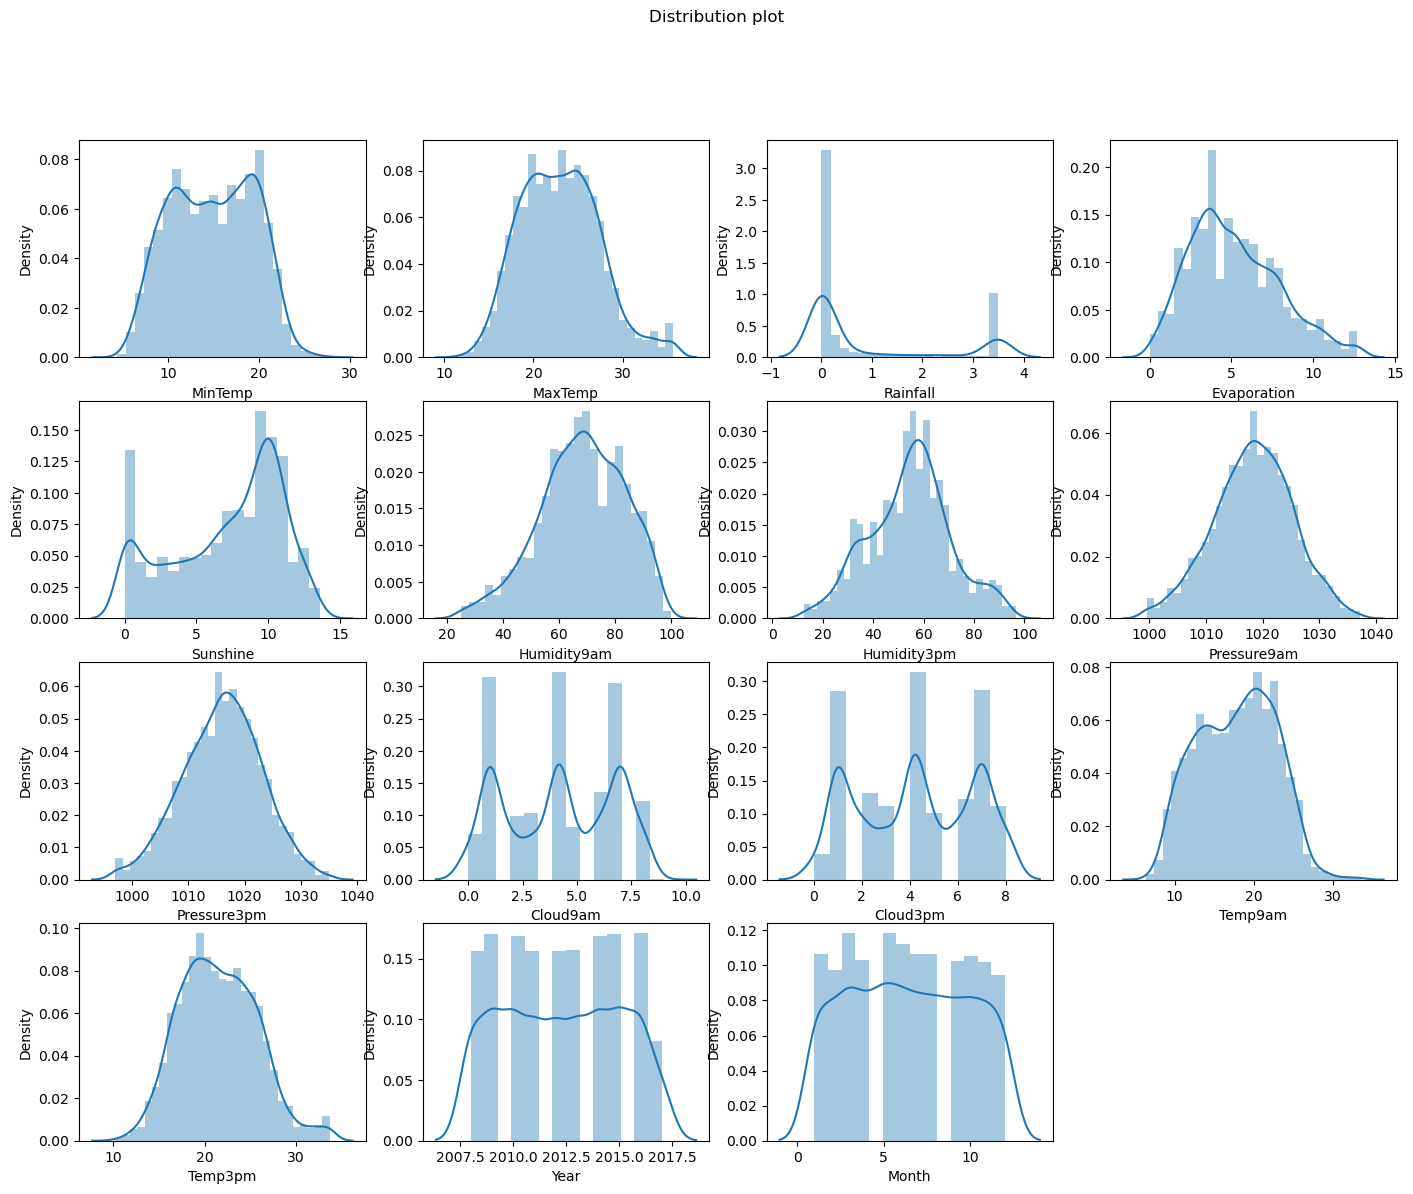

In [32]:
fig, ax = plt.subplots(4, 4, figsize = (17,13))
ax = ax.flatten()

for i, c in enumerate(df.select_dtypes(include = ['int64', 'float64'])):
    sns.distplot(x = df[c], ax = ax[i], axlabel= c)
plt.delaxes(ax[15])
plt.suptitle('Distribution plot', fontsize = 12)
plt.show()

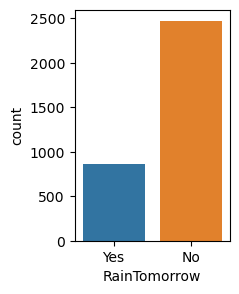

In [33]:
plt.figure(figsize= (2, 3))
sns.countplot(x= df.RainTomorrow)
plt.show()

#### Insights

- Outlier and missing value treatment has given numerical continuous features a good distribution
- Dependent variable, RainTomorrow has higher number of responses as 'No'

### Bivariate Analysis

It's the study of two variables, examining the relationship between them, and understanding how changes in one variable can affect the other, and vice versa.

In [34]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year',
       'Month'],
      dtype='object')

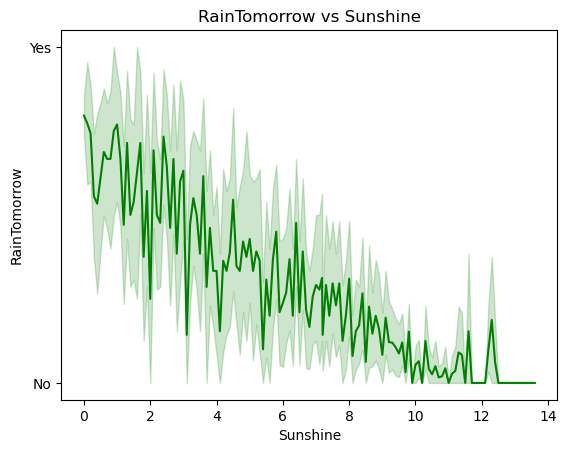

In [35]:
# plt.figure(figsize = (7, 6))
sns.lineplot(x= df.Sunshine, y= df.RainTomorrow, color= 'green')
plt.title('RainTomorrow vs Sunshine')
plt.show()

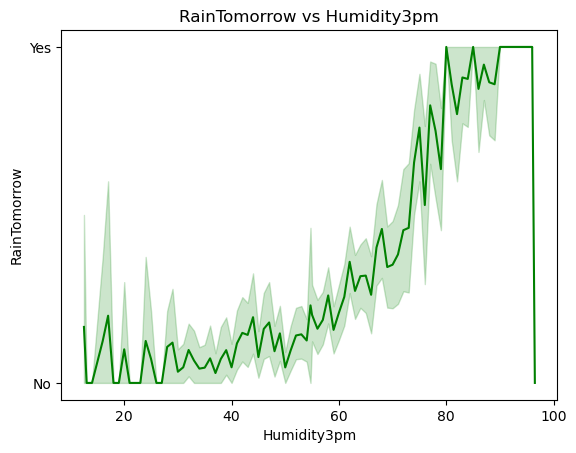

In [36]:
sns.lineplot(x= df.Humidity3pm, y= df.RainTomorrow, color= 'green')
plt.title('RainTomorrow vs Humidity3pm')
plt.show()

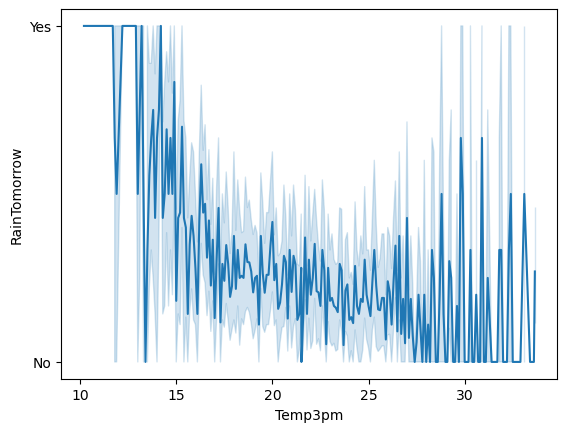

In [37]:
sns.lineplot(x= df.Temp3pm, y= df.RainTomorrow)
plt.show()

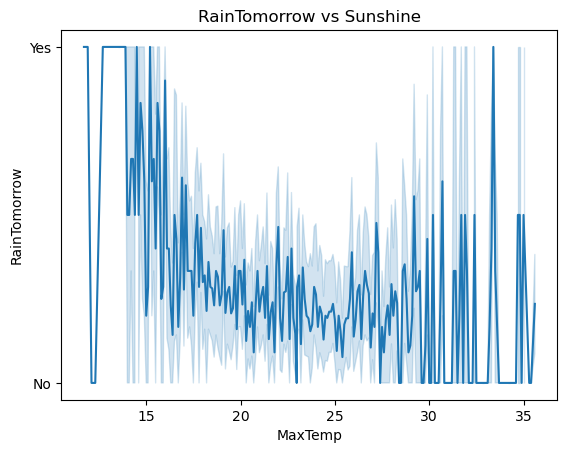

In [38]:
sns.lineplot(x= df.MaxTemp, y= df.RainTomorrow)
plt.title('RainTomorrow vs Sunshine')
plt.show()

##### Insights

- Bivariate analysis done between the dependent and independent variables
- We can see variables Sunshine and RainTomorrow is inversely related, as sunshine increases there is a less chance of rain
- Variable MaxTemp and RainTomorrow has its lineplot spread. A correlation matrix can give more information

### Multivariate Analysis

Analysis of more than two variables. This can be done with the help of correlation matrix.

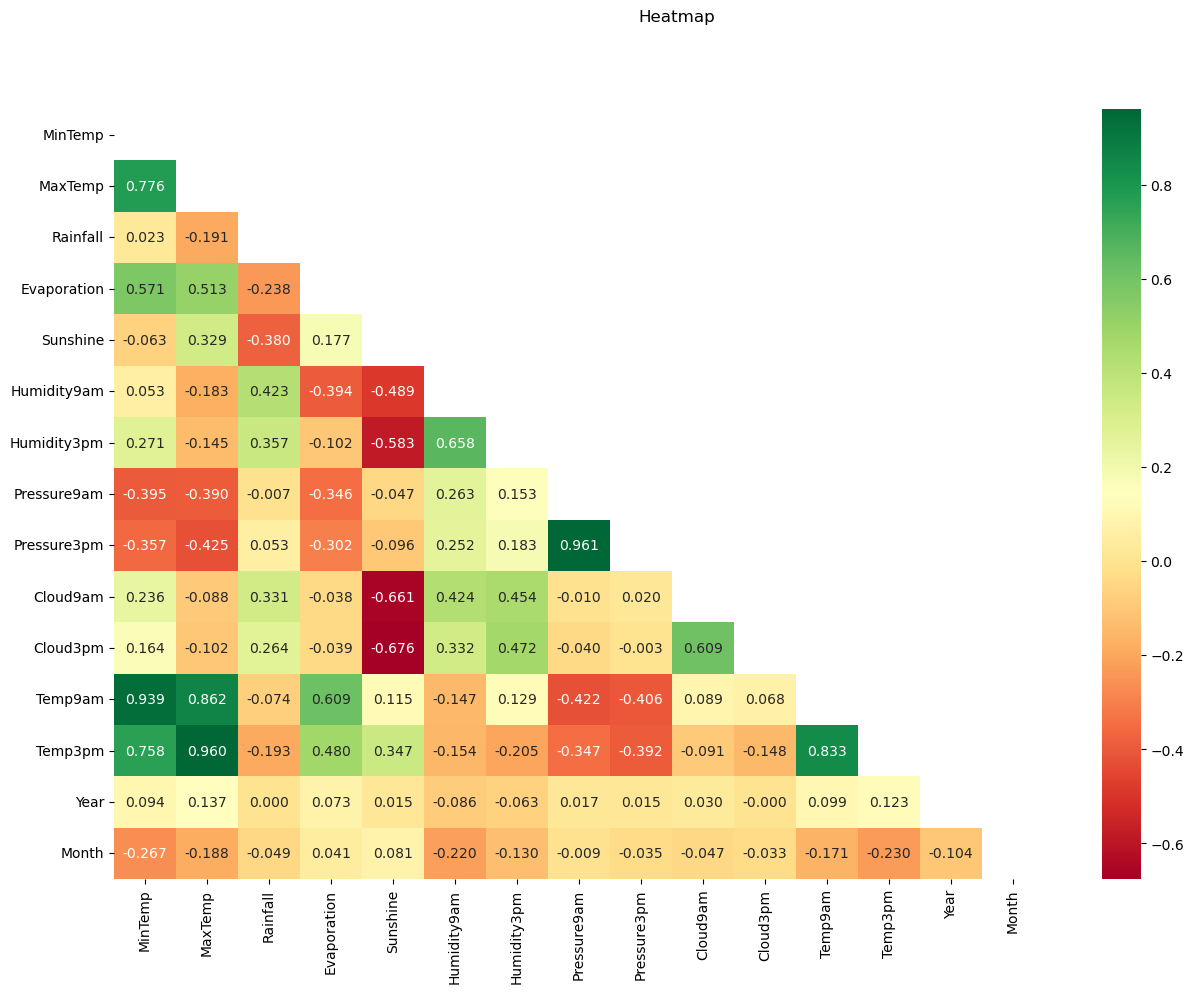

In [39]:
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt='0.3f', cmap='RdYlGn', mask=mask);
plt.suptitle('Heatmap')
plt.show()

#### Insights

- Features Temp9am and MinTemp are positively correlated with a correlation coefficient of 0.939
- Likewise Features Temp3pm and MaxTemp positively correlated with 0.960 
- Pressure3pm and Pressure9am positively correlated with 0.961
- We observe that several features exhibit a correlation exceeding 0.8, suggesting the presence of multicollinearity.
- Presence of multicollinearity might lose reliability in determining the effects of individual features in the model - and that can be a problem when it comes to interpretability.
- This task is for prediction. Hence proceeding with the dataset as it is.

### Encoding categorical variables

In [40]:
df.select_dtypes(include= 'object').columns

Index(['RainToday', 'RainTomorrow'], dtype='object')

In [41]:
df[['RainToday', 'RainTomorrow']].value_counts()

RainToday  RainTomorrow
No         No              2049
Yes        Yes              443
           No               423
No         Yes              422
dtype: int64

In [42]:
df['RainToday'].replace({'No':0, 'Yes':1}, inplace= True)
df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace= True)

df[['RainToday', 'RainTomorrow']].value_counts()

RainToday  RainTomorrow
0          0               2049
1          1                443
           0                423
0          1                422
dtype: int64

### Splitting the features into Independent and Dependent variable

In [43]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2008,2
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2008,2
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,2008,2
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,2008,2
4,19.7,25.7,3.5,5.174194,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,2008,2


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_temp= df.copy()

X= df.drop(columns= ['RainTomorrow'], axis= 1)
y= df.RainTomorrow

### Splitting the dataset to Training and Test set with a test set of size 0.20

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state= 22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2669, 16) (668, 16) (2669,) (668,)


## 6. Modeling

The task is to create a ML model to predict the rainfall. This is a classification problem in which the RainTomorrow feature is to be classified in one of the n classes based on the similarity index of its features with that of each class. Ensemble models are expected to perform better for classification problem due to its decision tree based logic and its ability to learn from weak learners.

### i) K-Nearest Neighbor (KNN)

A Supervised learning technique that assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

In [47]:
# Scaling of features is required since KNN is a distance based algorithm

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

pd.DataFrame(X_train_scaled, columns= X_train.columns).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month
0,-0.590447,-0.574453,-0.619936,0.681059,0.943558,-2.356383,-1.461531,0.030849,0.150056,-1.265495,-0.504895,-0.463542,-0.748182,-0.591052,0.615211,0.756347
1,0.801942,0.933773,-0.619936,1.051623,1.311181,-0.079684,-0.107433,0.290978,0.207452,-0.466049,-1.331688,1.042437,1.111228,-0.591052,1.340957,-1.586540
2,-0.723056,-0.848676,1.906270,-1.468211,-1.052110,1.728282,1.246665,2.082978,2.029798,1.532566,1.562087,-1.020548,-0.891213,1.691898,0.252339,-0.415096
3,1.288173,0.568142,-0.619936,-0.875309,-1.787356,0.121201,0.569616,-0.359344,-0.165626,1.532566,0.735294,0.980547,0.801327,-0.591052,1.703830,-1.586540
4,-0.877766,-0.711565,-0.619936,-0.356519,0.339606,-0.950187,-1.584631,-0.691731,-0.553054,0.733120,0.321898,-0.793620,-0.843536,-0.591052,0.252339,0.463486


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Base model - thumbrule of sqrt of n taken as k
# k = 56

clf_knn_1 = KNeighborsClassifier(n_neighbors= 56)
clf_knn_1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=56)

In [50]:
y_train_predict= clf_knn_1.predict(X_train_scaled)
y_test_predict= clf_knn_1.predict(X_test_scaled)

clf_knn_train_acc_score= accuracy_score(y_train, y_train_predict)
clf_knn_test_acc_score= accuracy_score(y_test, y_test_predict)
clf_knn_1_train_predict= y_train_predict
clf_knn_1_test_predict= y_test_predict

print('Train accuracy: {}'.format(clf_knn_train_acc_score))
print('Test accuracy: {}'.format(clf_knn_test_acc_score))

Train accuracy: 0.8298988385162982
Test accuracy: 0.8233532934131736


In [51]:
ac_score_train = []
ac_score_test = []

for i in range(5, 80, 2):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled, y_train)
    
    #Train accuracy
#     score1= accuracy_score(y_train, knn.predict(X_train_scaled))
    score1= knn.score(X_train_scaled, y_train)
    ac_score_train.append(score1)
    
    
    #Test accuracy
#     score2= accuracy_score(y_test, knn.predict(X_test_scaled))
    score2= knn.score(X_test_scaled, y_test)
    ac_score_test.append(score2)

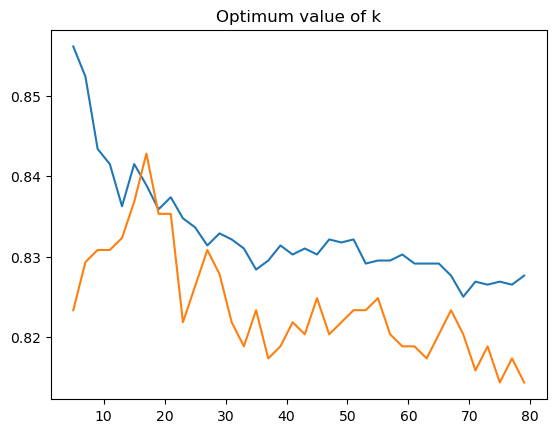

In [52]:
plt.title('Optimum value of k')
plt.plot(range(5,80,2), ac_score_train)
plt.plot(range(5,80,2), ac_score_test)
plt.show()

In [53]:
clf_knn_2 = KNeighborsClassifier(n_neighbors= 15)
clf_knn_2.fit(X_train_scaled, y_train)

y_train_predict= clf_knn_2.predict(X_train_scaled)
y_test_predict= clf_knn_2.predict(X_test_scaled)

clf_knn_train_acc_score_best= accuracy_score(y_train, y_train_predict)
clf_knn_test_acc_score_best= accuracy_score(y_test, y_test_predict)
clf_knn_train_predict_best= y_train_predict
clf_knn_test_predict_best= y_test_predict

print('Train accuracy: {}'.format(clf_knn_train_acc_score_best))
print('Test accuracy: {}'.format(clf_knn_test_acc_score_best))

Train accuracy: 0.8415136755339079
Test accuracy: 0.8368263473053892


#### Insights

- KNN is a distance based algorithm. Hence scaling done before fitting the model
- The thumbrule for selecting n_neighbors is sqrt of n. 
- Base model gave a good prediction on test data with 82.33% accuracy
- An optimum value of n_neighbors found out by plotting the accuracy scores
- Optimum model gave an accuracy score of 84.15 and 83.68 on Train and Test set respectively

### ii) Decision Tree Classifier

A Decision tree is a non-parametric learning algorithm. It has a hierarchical tree structure consisting of a root node, branches, internal nodes and leaf nodes.

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf_dtree_1= DecisionTreeClassifier(max_depth= 5)
clf_dtree_1.fit(X_train, y_train)

clf_dtree_1_train_predict= clf_dtree_1.predict(X_train)
clf_dtree_1_test_predict= clf_dtree_1.predict(X_test)

clf_dtree_train_acc_score= accuracy_score(y_train, clf_dtree_1_train_predict)
clf_dtree_test_acc_score= accuracy_score(y_test, clf_dtree_1_test_predict)

print('Train accuracy: {}'.format(clf_dtree_train_acc_score))
print('Test accuracy: {}'.format(clf_dtree_test_acc_score))

Train accuracy: 0.8490071187710753
Test accuracy: 0.8143712574850299


#### Model tuning with Hyper parameters

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
clf_dtree_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
df.shape

(3337, 17)

In [73]:
param_grid= {
                'max_depth' : [3, 4],
                'min_samples_leaf' : range(90, 110, 2),
                'min_samples_split': range(150, 250, 5)
            }

clf_dtree= DecisionTreeClassifier(random_state= 22)

grid_search= GridSearchCV(clf_dtree, param_grid, n_jobs= -1, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 150}

In [74]:
clf_dtree_2= DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 96, min_samples_split= 150)
clf_dtree_2.fit(X_train, y_train)

clf_dtree_train_predict_best= clf_dtree_2.predict(X_train)
clf_dtree_test_predict_best= clf_dtree_2.predict(X_test)

clf_dtree_train_acc_score_best= accuracy_score(y_train, clf_dtree_train_predict_best)
clf_dtree_test_acc_score_best= accuracy_score(y_test, clf_dtree_test_predict_best)

print('Train accuracy: {}'.format(clf_dtree_train_acc_score_best))
print('Test accuracy: {}'.format(clf_dtree_test_acc_score_best))

Train accuracy: 0.8366429374297489
Test accuracy: 0.8353293413173652


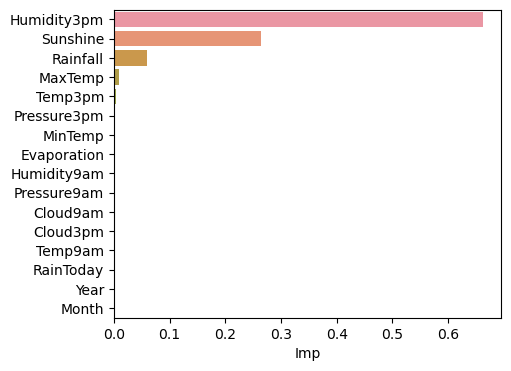

In [113]:
plt.figure(figsize= (5,4))
dtree_fimp= pd.DataFrame(clf_dtree_2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
# dtree_fimp
sns.barplot(x= dtree_fimp.Imp, y=dtree_fimp.index)
plt.show()

In [62]:
# Plotting a decision tree

from sklearn import tree
from IPython.display import Image
import pydotplus 

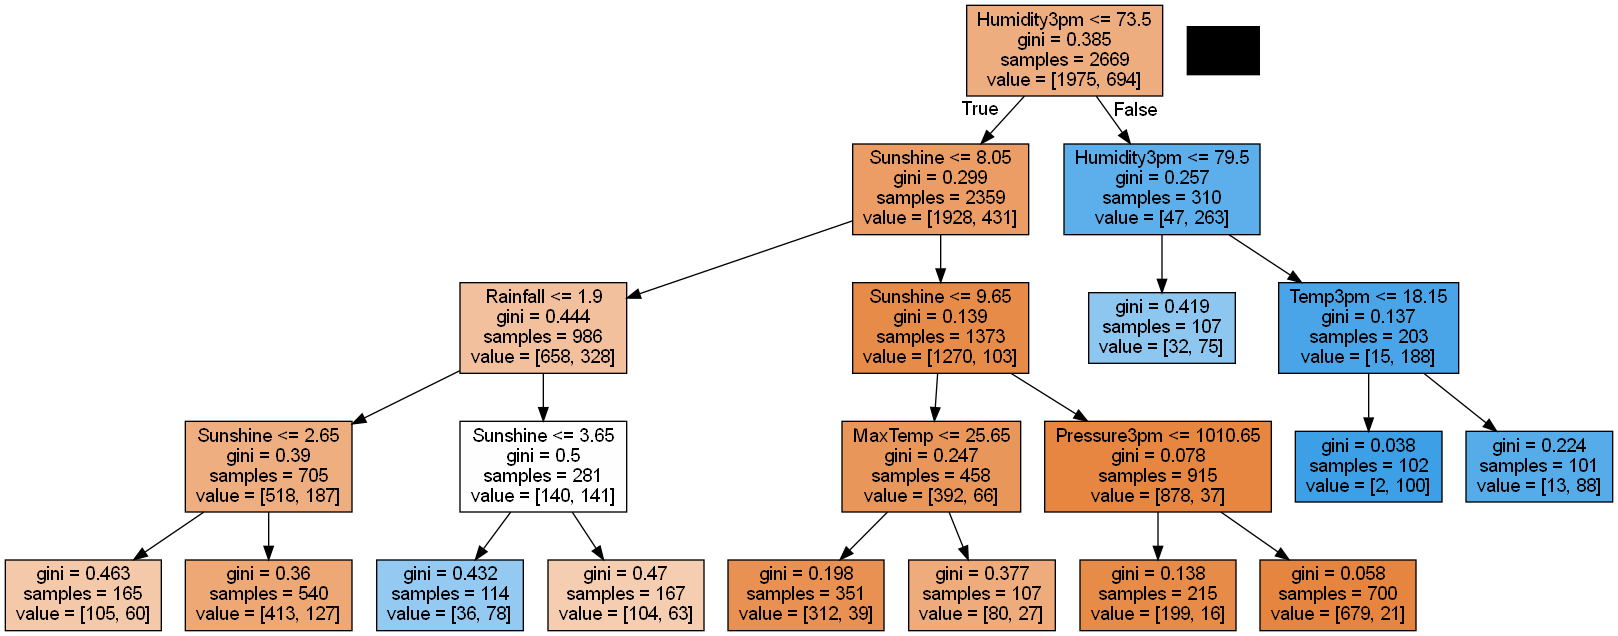

In [63]:
dot_data = tree.export_graphviz(clf_dtree_2, out_file= None, feature_names= X_train.columns, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

This is the visualization of Decision tree with depth 4. It is evident that the Decision Tree has adhered to the specified parameters for min_samples_split and min_samples_leaf.

#### Insights
- Decision trees follow a tree structure which is simple to interpret
- A base model run on test dataset gave out an accuracy score 0.8143
- GridSearchCV method is used for hyper-parameter tuning
- Decision tree with hyper-parameter tuning gave out a good model with a Train score of 0.8366 and Test score of 0.8353
- Checking the feature_importance, features Humidity3pm and Sunshine plays the major role in predicting the rainfall

### Ensemble models

### iii) Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction. For classification problems majority vote forms the final prediction.

In [64]:
from sklearn.ensemble import BaggingClassifier

Bagging Classifier with base estimator DecisionTreeClassifier(max_depth= 4)

In [65]:
# clf_dtree= DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 96, min_samples_split= 150)
clf_dtree= DecisionTreeClassifier(max_depth= 4)

clf_bag_1= BaggingClassifier(base_estimator= clf_dtree, n_estimators= 1000, n_jobs= -1, random_state= 22, bootstrap= True)
clf_bag_1.fit(X_train, y_train)

clf_bag_1_train_predict= clf_bag_1.predict(X_train)
clf_bag_1_test_predict= clf_bag_1.predict(X_test)

clf_bag_train_acc_score= accuracy_score(y_train, clf_bag_1_train_predict)
clf_bag_test_acc_score= accuracy_score(y_test, clf_bag_1_test_predict)

print('Train accuracy: {}'.format(clf_bag_train_acc_score))
print('Test accuracy: {}'.format(clf_bag_test_acc_score))

Train accuracy: 0.8433870363431997
Test accuracy: 0.8323353293413174


BaggingClassifier with hyperparameter-tuned DecisionTreeClassifier

In [75]:
# Decision Tree classifier with hyper tuned parameters
clf_dtree= DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 96, min_samples_split= 150)

clf_bag_best= BaggingClassifier(base_estimator= clf_dtree, n_estimators= 1000, n_jobs= -1, random_state= 22, bootstrap= True)
clf_bag_best.fit(X_train, y_train)

clf_bag_train_predict_best= clf_bag_best.predict(X_train)
clf_bag_test_predict_best= clf_bag_best.predict(X_test)

clf_bag_train_acc_score_best= accuracy_score(y_train, clf_bag_train_predict_best)
clf_bag_test_acc_score_best= accuracy_score(y_test, clf_bag_test_predict_best)

print('Train accuracy: {}'.format(clf_bag_train_acc_score_best))
print('Test accuracy: {}'.format(clf_bag_test_acc_score_best))

Train accuracy: 0.8392656425627576
Test accuracy: 0.8353293413173652


#### Insights
- Bagging classifer with base_estimator as DecisionTreeClassifier
- Hyper-parameter tuning done with GridSearchCV
- Wanted to check whether Bagging classifier can give out better performance in case hyper tuned DecisionTreeClassifier given as base_estimator
- No noticeable change in performance
- Prediction given out by the model is Train dataset with 0.8392 and Test dataset with 0.8353

### iv) Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# clf_rfcl_1= RandomForestClassifier(n_estimators= 1000, n_jobs= -1)
clf_rfcl_1= RandomForestClassifier()
clf_rfcl_1.fit(X_train, y_train)

clf_rfcl_1_train_predict= clf_rfcl_1.predict(X_train)
clf_rfcl_1_test_predict= clf_rfcl_1.predict(X_test)

clf_rfcl_train_acc_score= accuracy_score(y_train, clf_rfcl_1_train_predict)
clf_rfcl_test_acc_score= accuracy_score(y_test, clf_rfcl_1_test_predict)

print('Train accuracy: {}'.format(clf_rfcl_train_acc_score))
print('Test accuracy: {}'.format(clf_rfcl_test_acc_score))

Train accuracy: 1.0
Test accuracy: 0.8473053892215568


Hyper parameter tuning using GridSearchCV

In [68]:
param_grid = {
                'n_estimators' : [500, 1000],
                'max_features' : ['sqrt', 'log2', None],
                'min_samples_leaf': [100,95,105,65,64,70],
                'min_samples_split': [200,210,300,95]
            }

clf_rfcl_2= RandomForestClassifier(random_state= 22)
grid_search= GridSearchCV(clf_rfcl_2, param_grid= param_grid, n_jobs= -1, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_features': None,
 'min_samples_leaf': 65,
 'min_samples_split': 95,
 'n_estimators': 500}

In [77]:
clf_rfcl_2= RandomForestClassifier(n_estimators= 500, max_features= None, min_samples_leaf= 65, min_samples_split= 95)
clf_rfcl_2.fit(X_train, y_train)

clf_rfcl_train_predict_best= clf_rfcl_2.predict(X_train)
clf_rfcl_test_predict_best= clf_rfcl_2.predict(X_test)

clf_rfcl_train_acc_score_best= accuracy_score(y_train, clf_rfcl_train_predict_best)
clf_rfcl_test_acc_score_best= accuracy_score(y_test, clf_rfcl_test_predict_best)

print('Train accuracy: {}'.format(clf_rfcl_train_acc_score_best))
print('Test accuracy: {}'.format(clf_rfcl_test_acc_score_best))

Train accuracy: 0.8385162982390408
Test accuracy: 0.8338323353293413


RandomizedSearchCV is another technique used for hyper parameter tuning. Grid Search exhaustively searches through every combination of hyperparameter values specified. And hence computationaly expensive. In contrast to GridSearch, not all given parameter values are tried out in Randomized Search. Rather a fixed number of parameter settings is sampled from the specified distributions.

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
param_grid = {
                'n_estimators' : [500, 600, 1000],
                'max_features' : ['sqrt', 'log2', None],
                'min_samples_leaf': range(65, 200, 2), #[100,95,105,65,64,70],
                'min_samples_split': range(90, 210, 1) #[200,210,300,95]
            }

clf_rfcl_2= RandomForestClassifier(random_state= 22)
random_search= RandomizedSearchCV(clf_rfcl_2, param_distributions= param_grid, n_jobs= -1, cv= 2, random_state= 22, \
                                  scoring= 'accuracy'
                                 )
random_search.fit(X_train, y_train)

random_search.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=67,
                       min_samples_split=120, n_estimators=1000,
                       random_state=22)

In [79]:
# clf_rfcl_2= RandomForestClassifier(n_estimators= 1000, max_features= None, min_samples_leaf= 89, min_samples_split= 107, \
#                                   random_state= 22)
clf_rfcl_2= RandomForestClassifier(n_estimators= 1000, max_features= 'log2', min_samples_leaf= 67, min_samples_split= 120, \
                                  random_state= 22)
clf_rfcl_2.fit(X_train, y_train)

clf_rfcl_train_predict_best= clf_rfcl_2.predict(X_train)
clf_rfcl_test_predict_best= clf_rfcl_2.predict(X_test)

clf_rfcl_train_acc_score_best= accuracy_score(y_train, clf_rfcl_train_predict_best)
clf_rfcl_test_acc_score_best= accuracy_score(y_test, clf_rfcl_test_predict_best)

print('Train accuracy: {}'.format(clf_rfcl_train_acc_score_best))
print('Test accuracy: {}'.format(clf_rfcl_test_acc_score_best))

Train accuracy: 0.8415136755339079
Test accuracy: 0.8353293413173652


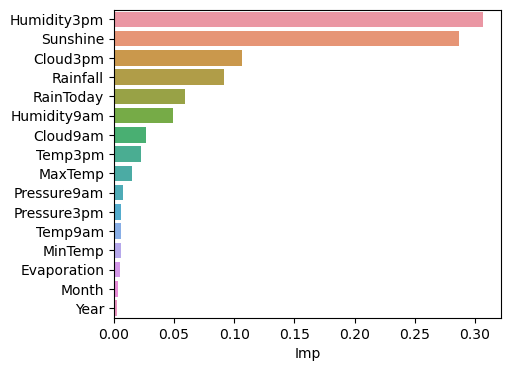

In [80]:
plt.figure(figsize= (5,4))
rfcl_fimp= pd.DataFrame(clf_rfcl_2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
# dtree_fimp
sns.barplot(x= rfcl_fimp.Imp, y=rfcl_fimp.index)
plt.show()

#### Insights
- RandomForest fits a number of Decision Trees on various sub-samples
- Base model was overfitted. Gave a 100% performance on Training set and poor performance on Test dataset
- Two techniques were used for getting the hyper parameters
- GridSearchCV and RandomizedSearchCV
- As per Random forest all the features have relative importance in predicting the dependent variable 'rainfalltomorrow' with Humidity3pm and Sunshine has the highest

### v) Adaptive Boosting (AdaBoost)

The main idea behind AdaBoost is to iteratively train the weak classifier on the training dataset with each successive classifier giving more weightage to the data points that are misclassified. The final AdaBoost model is decided by combining all the weak classifier that has been used for training with the weightage given to the models according to their accuracies. 

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
clf_adb_1= AdaBoostClassifier()
clf_adb_1.fit(X_train, y_train)

clf_adb_1_train_predict= clf_adb_1.predict(X_train)
clf_adb_1_test_predict= clf_adb_1.predict(X_test)

clf_adb_train_acc_score= accuracy_score(y_train, clf_adb_1_train_predict)
clf_adb_test_acc_score= accuracy_score(y_test, clf_adb_1_test_predict)

print('Train accuracy: {}'.format(clf_adb_train_acc_score))
print('Test accuracy: {}'.format(clf_adb_test_acc_score))

Train accuracy: 0.8463844136380667
Test accuracy: 0.8368263473053892


By default base_estimator used in AdaBoost algorithm is DecisionTreeClassifier

Hyper parameter tuning using GridSearchCV

In [77]:
param_grid = {
                'n_estimators' : [500,1000,1500],
                'learning_rate': [0.001, 0.01, 0.1, 1, 10]
}

clf_adb_2= AdaBoostClassifier(random_state= 22)
grid_search= GridSearchCV(clf_adb_2, param_grid= param_grid, n_jobs= -1, cv= 2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [82]:
clf_adb_2= AdaBoostClassifier(n_estimators= 500, learning_rate= 0.1)
clf_adb_2.fit(X_train, y_train)

clf_adb_train_predict_best= clf_adb_2.predict(X_train)
clf_adb_test_predict_best= clf_adb_2.predict(X_test)

clf_adb_train_acc_score_best= accuracy_score(y_train, clf_adb_train_predict_best)
clf_adb_test_acc_score_best= accuracy_score(y_test, clf_adb_test_predict_best)

print('Train accuracy: {}'.format(clf_adb_train_acc_score_best))
print('Test accuracy: {}'.format(clf_adb_test_acc_score_best))

Train accuracy: 0.8448857249906332
Test accuracy: 0.8338323353293413


#### Insights
- Base model on AdaBoost algorithm gave an accuracy score of 0.8368 on Test dataset
- Hyper-parameter tuning done with GridSearchCV method
- A combination of n_estimators and learning_rate tried with cv= 2
- A good fit model with accuracy score of 0.8448 on Training and 0.8338 on Test dataset
- No observable accuracy score obtained even after trying the Boosting technique on the dataset

### vi) Extreme Gradient Boosting (XGBoost)

XGBoost is an ensemble learning method. The algorithm works by sequentially adding weak learners to the ensemble, with each new learner focusing on correcting the errors made by the existing ones. It uses a gradient descent optimization technique to minimize a predefined loss function during training.

In [83]:
import xgboost as xgb

In [80]:
clf_xgb_1= xgb.XGBClassifier()
clf_xgb_1.fit(X_train, y_train)

clf_xgb_1_train_predict= clf_xgb_1.predict(X_train)
clf_xgb_1_test_predict= clf_xgb_1.predict(X_test)

clf_xgb_train_acc_score= accuracy_score(y_train, clf_xgb_1_train_predict)
clf_xgb_test_acc_score= accuracy_score(y_test, clf_xgb_1_test_predict)

print('Train accuracy: {}'.format(clf_xgb_train_acc_score))
print('Test accuracy: {}'.format(clf_xgb_test_acc_score))

Train accuracy: 1.0
Test accuracy: 0.8203592814371258


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

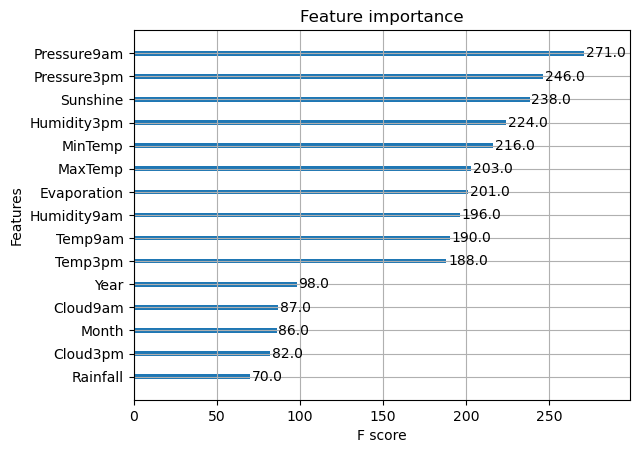

In [112]:
xgb.plot_importance(clf_xgb_1)

In [93]:
param_grid = {
                'max_depth' : range(3,10,2),
                'gamma' : [0.1,0.2,0.3],
                'subsample' : [0.8,0.9],
                'colsample_bytree' : [0.8,0.9],
                'reg_alpha' : [1e-2, 0.1, 1]
            }

clf_xgb_2= xgb.XGBClassifier()
grid_search= GridSearchCV(clf_xgb_2, param_grid = param_grid, n_jobs= -1, scoring= 'accuracy', cv = 5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

In [84]:
clf_xgb_2= xgb.XGBClassifier(colsample_bytree= 0.8, gamma= 0.3, max_depth= 3, reg_alpha= 1, subsample= 0.9)
clf_xgb_2.fit(X_train, y_train)

clf_xgb_train_predict= clf_xgb_2.predict(X_train)
clf_xgb_test_predict= clf_xgb_2.predict(X_test)

clf_xgb_train_acc_score_best= accuracy_score(y_train, clf_xgb_train_predict)
clf_xgb_test_acc_score_best= accuracy_score(y_test, clf_xgb_test_predict)

print('Train accuracy: {}'.format(clf_xgb_train_acc_score_best))
print('Test accuracy: {}'.format(clf_xgb_test_acc_score_best))

Train accuracy: 0.9123267141251405
Test accuracy: 0.8308383233532934


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

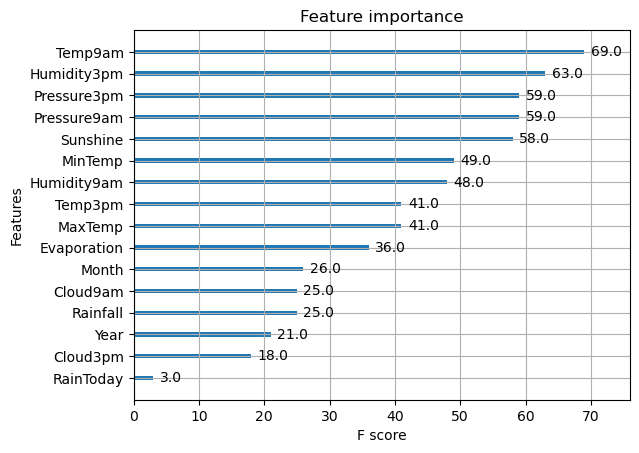

In [85]:
xgb.plot_importance(clf_xgb_2)

#### Insights
- Base model of XGBoost gave an overfit on Training and Test dataset
- Hyper parameter tuning done with GridSearchCV technique
- Compared to other algorithms this gave a higher accuracy score on Training set 0.9123 and accuracy score of Test dataset was 0.8308
- Checking the feature importance, all variables affects the dependent variable with Temp9am and Humidity3pm has highest relative importance

### vii) XGBoost Random Forest Classifier

XGBRFClassifier is SKL-like classes that provide random forest functionality. It is basically version of XGBClassifier.

In [86]:
from xgboost import XGBRFClassifier

In [87]:
clf_xgbrf_1= xgb.XGBRFClassifier(n_jobs= -1, n_estimators= 100, max_depth= 5)
clf_xgbrf_1.fit(X_train, y_train)

clf_xgbrf_1_train_predict= clf_xgbrf_1.predict(X_train)
clf_xgbrf_1_test_predict= clf_xgbrf_1.predict(X_test)

clf_xgbrf_train_acc_score= accuracy_score(y_train, clf_xgbrf_1_train_predict)
clf_xgbrf_test_acc_score= accuracy_score(y_test, clf_xgbrf_1_test_predict)

print('Train accuracy: {}'.format(clf_xgbrf_train_acc_score))
print('Test accuracy: {}'.format(clf_xgbrf_test_acc_score))

Train accuracy: 0.8538778568752342
Test accuracy: 0.8353293413173652


#### Insights
- Since the dataset is small, XGBRFClassifier did not give much of a noticeable change in the accuracy scores
- Got Train and Test accuracy score as 0.8538 and 0.8353 respectively

## 7. Performance Metrics

In [118]:
index = ['Train Accuracy', 'Test Accuracy']

data = pd.DataFrame(
    {
    'KNN' : ['{:.3f}'.format(clf_knn_train_acc_score_best),'{:.3f}'.format(clf_knn_test_acc_score_best)],
    'Decision Tree': ['{:.3f}'.format(clf_dtree_train_acc_score_best),'{:.3f}'.format(clf_dtree_test_acc_score_best)],
    'Bagging': ['{:.3f}'.format(clf_bag_train_acc_score_best),'{:.3f}'.format(clf_bag_test_acc_score_best)],
    'Random Forest': ['{:.3f}'.format(clf_rfcl_train_acc_score_best),'{:.3f}'.format(clf_rfcl_test_acc_score_best)],
    'AdaBoost': ['{:.3f}'.format(clf_adb_train_acc_score_best),'{:.3f}'.format(clf_adb_test_acc_score_best)],
    'XGBoost': ['{:.3f}'.format(clf_xgb_train_acc_score_best),'{:.3f}'.format(clf_xgb_test_acc_score_best)],
    'XGB Random Forest':['{:.3f}'.format(clf_xgbrf_train_acc_score),'{:.3f}'.format(clf_xgbrf_test_acc_score)]
    },
        index= index
)

data

,KNN,Decision Tree,Bagging,Random Forest,AdaBoost,XGBoost,XGB Random Forest
Train Accuracy,0.842,0.837,0.839,0.842,0.845,0.912,0.854
Test Accuracy,0.837,0.835,0.835,0.835,0.834,0.831,0.835


In [119]:
# Rounding off to two decimal places

index = ['Train Accuracy', 'Test Accuracy']

data = pd.DataFrame(
    {
    'KNN' : ['{:.2f}'.format(clf_knn_train_acc_score_best),'{:.2f}'.format(clf_knn_test_acc_score_best)],
    'Decision Tree': ['{:.2f}'.format(clf_dtree_train_acc_score_best),'{:.2f}'.format(clf_dtree_test_acc_score_best)],
    'Bagging': ['{:.2f}'.format(clf_bag_train_acc_score_best),'{:.2f}'.format(clf_bag_test_acc_score_best)],
    'Random Forest': ['{:.2f}'.format(clf_rfcl_train_acc_score_best),'{:.2f}'.format(clf_rfcl_test_acc_score_best)],
    'AdaBoost': ['{:.2f}'.format(clf_adb_train_acc_score_best),'{:.2f}'.format(clf_adb_test_acc_score_best)],
    'XGBoost': ['{:.2f}'.format(clf_xgb_train_acc_score_best),'{:.2f}'.format(clf_xgb_test_acc_score_best)],
    'XGB Random Forest':['{:.2f}'.format(clf_xgbrf_train_acc_score),'{:.2f}'.format(clf_xgbrf_test_acc_score)]
    },
        index= index
)

data

,KNN,Decision Tree,Bagging,Random Forest,AdaBoost,XGBoost,XGB Random Forest
Train Accuracy,0.84,0.84,0.84,0.84,0.84,0.91,0.85
Test Accuracy,0.84,0.84,0.84,0.84,0.83,0.83,0.84


#### Most of the algorithms have produced well-fitted models with performance on test set 83-84%. KNN, Decision Tree, Bagging with Decision Tree and Random Forest have give 84% on both Train and Test set.

### Confusion Matrix of Decision Tree, Bagging and Random Forest models

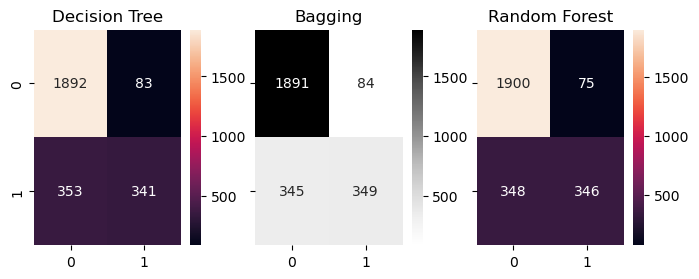

In [121]:
# plt.figure(figsize= (3, 3))
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False, figsize= (7, 2.75))
f.tight_layout()

plot_0 = sns.heatmap((confusion_matrix(y_train, clf_dtree_train_predict_best)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Decision Tree')

plot_1 = sns.heatmap((confusion_matrix(y_train, clf_bag_train_predict_best)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Bagging');

plot_2 = sns.heatmap((confusion_matrix(y_train, clf_rfcl_train_predict_best)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Random Forest');

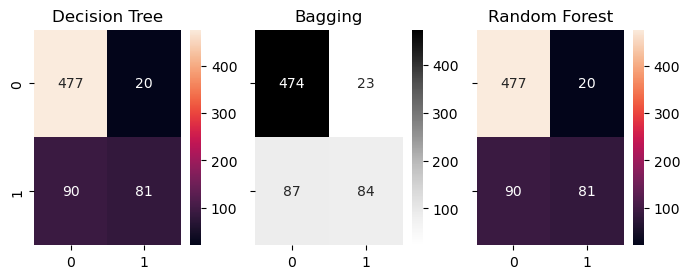

In [122]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False, figsize= (7, 2.75))
f.tight_layout()

plot_0 = sns.heatmap((confusion_matrix(y_test, clf_dtree_test_predict_best)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Decision Tree')

plot_1 = sns.heatmap((confusion_matrix(y_test, clf_bag_test_predict_best)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Bagging');

plot_2 = sns.heatmap((confusion_matrix(y_test, clf_rfcl_test_predict_best)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Random Forest');

### AUC - ROC Curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# AUC
probs = bgcl_1.predict_proba(X_train)
probs = probs[:, 1]
bgcl_model_1_auc_train = round(roc_auc_score(y_train, probs), 3)
bag_model_1_train_fpr, bag_model_1_train_tpr, threshold = roc_curve(y_train, probs)
probs = bgcl_1.predict_proba(X_test)
probs = probs[:, 1]
bgcl_model_1_auc_test = round(roc_auc_score(y_test, probs), 3)
bag_model_1_test_fpr, bag_model_1_test_tpr, threshold = roc_curve(y_test, probs)

In [107]:
# KNN
probs= clf_knn_2.predict_proba(X_train)
probs= probs[:, 1]
clf_knn_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_knn_train_fpr, clf_knn_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_knn_2.predict_proba(X_test)
probs= probs[:, 1]
clf_knn_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_knn_test_fpr, clf_knn_test_tpr, threshold= roc_curve(y_test, probs)

# Decision Tree
probs= clf_dtree_2.predict_proba(X_train)
probs= probs[:, 1]
clf_dtree_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_dtree_train_fpr, clf_dtree_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_dtree_2.predict_proba(X_test)
probs= probs[:, 1]
clf_dtree_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_dtree_test_fpr, clf_dtree_test_tpr, threshold= roc_curve(y_test, probs)

# Bagging 
probs= clf_bag_best.predict_proba(X_train)
probs= probs[:, 1]
clf_bag_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_bag_train_fpr, clf_bag_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_bag_best.predict_proba(X_test)
probs= probs[:, 1]
clf_bag_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_bag_test_fpr, clf_bag_test_tpr, threshold= roc_curve(y_test, probs)

# Random Forest
probs= clf_rfcl_2.predict_proba(X_train)
probs= probs[:, 1]
clf_rfcl_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_rfcl_train_fpr, clf_rfcl_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_rfcl_2.predict_proba(X_test)
probs= probs[:, 1]
clf_rfcl_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_rfcl_test_fpr, clf_rfcl_test_tpr, threshold= roc_curve(y_test, probs)

# Ada Boost
probs= clf_adb_2.predict_proba(X_train)
probs= probs[:, 1]
clf_adb_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_adb_train_fpr, clf_adb_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_adb_2.predict_proba(X_test)
probs= probs[:, 1]
clf_adb_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_adb_test_fpr, clf_adb_test_tpr, threshold= roc_curve(y_test, probs)

# XGBoost
probs= clf_xgb_2.predict_proba(X_train)
probs= probs[:, 1]
clf_xgb_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_xgb_train_fpr, clf_xgb_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_xgb_2.predict_proba(X_test)
probs= probs[:, 1]
clf_xgb_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_xgb_test_fpr, clf_xgb_test_tpr, threshold= roc_curve(y_test, probs)

# XGBoost Random Forest
probs= clf_xgbrf_1.predict_proba(X_train)
probs= probs[:, 1]
clf_xgbrf_auc_train= round(roc_auc_score(y_train, probs), 3)
clf_xgbrf_train_fpr, clf_xgbrf_train_tpr, threshold= roc_curve(y_train, probs)
probs= clf_xgbrf_1.predict_proba(X_test)
probs= probs[:, 1]
clf_xgbrf_auc_test= round(roc_auc_score(y_test, probs), 3)
clf_xgbrf_test_fpr, clf_xgbrf_test_tpr, threshold= roc_curve(y_test, probs)

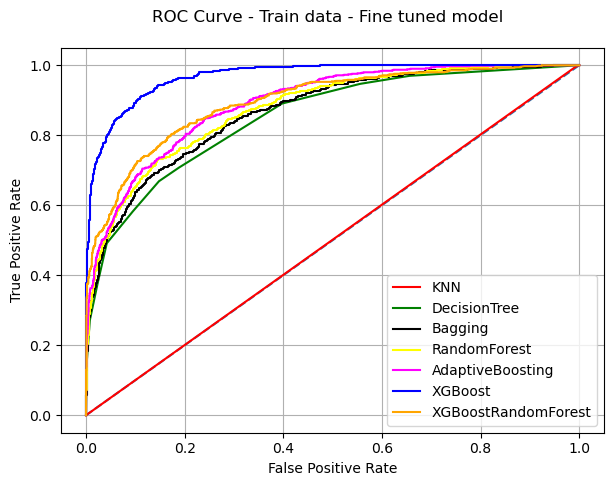

In [123]:
# ROC Curve of  Train data - Tuned

plt.figure(figsize = (7, 5))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(clf_knn_train_fpr, clf_knn_train_tpr, color = 'red', label = 'KNN')
plt.plot(clf_dtree_train_fpr, clf_dtree_train_tpr, color = 'green', label = 'DecisionTree')
plt.plot(clf_bag_train_fpr, clf_bag_train_tpr, color = 'black', label = 'Bagging')
plt.plot(clf_rfcl_train_fpr, clf_rfcl_train_tpr, color = 'yellow', label = 'RandomForest')
plt.plot(clf_adb_train_fpr, clf_adb_train_tpr, color = 'magenta', label = 'AdaptiveBoosting')
plt.plot(clf_xgb_train_fpr, clf_xgb_train_tpr, color = 'blue', label = 'XGBoost')
plt.plot(clf_xgbrf_train_fpr, clf_xgbrf_train_tpr, color = 'orange', label = 'XGBoostRandomForest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train data - Fine tuned model  \n')
plt.grid()
plt.legend()
plt.show()

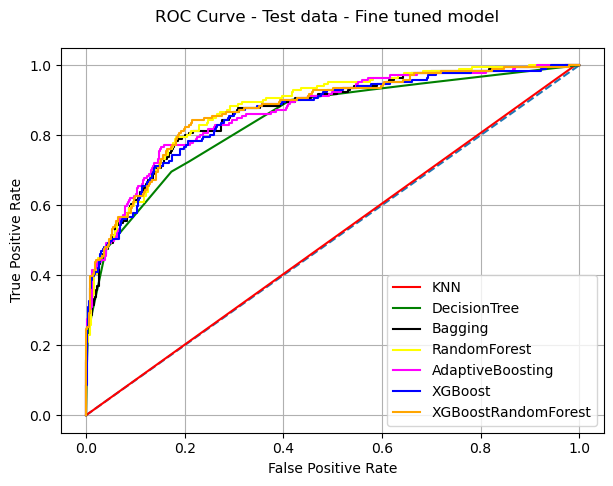

In [124]:
# ROC Curve of  Train data - Tuned

plt.figure(figsize = (7, 5))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(clf_knn_test_fpr, clf_knn_test_tpr, color = 'red', label = 'KNN')
plt.plot(clf_dtree_test_fpr, clf_dtree_test_tpr, color = 'green', label = 'DecisionTree')
plt.plot(clf_bag_test_fpr, clf_bag_test_tpr, color = 'black', label = 'Bagging')
plt.plot(clf_rfcl_test_fpr, clf_rfcl_test_tpr, color = 'yellow', label = 'RandomForest')
plt.plot(clf_adb_test_fpr, clf_adb_test_tpr, color = 'magenta', label = 'AdaptiveBoosting')
plt.plot(clf_xgb_test_fpr, clf_xgb_test_tpr, color = 'blue', label = 'XGBoost')
plt.plot(clf_xgbrf_test_fpr, clf_xgbrf_test_tpr, color = 'orange', label = 'XGBoostRandomForest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test data - Fine tuned model  \n')
plt.grid()
plt.legend()
plt.show()

In [125]:
index = ['Train AUC', 'Test AUC']

data = pd.DataFrame(
    {
    'KNN' : ['{:.2f}'.format(clf_knn_auc_train),'{:.2f}'.format(clf_knn_auc_test)],
    'Decision Tree': ['{:.2f}'.format(clf_dtree_auc_train),'{:.2f}'.format(clf_dtree_auc_test)],
    'Bagging': ['{:.2f}'.format(clf_bag_auc_train),'{:.2f}'.format(clf_bag_auc_test)],
    'Random Forest': ['{:.2f}'.format(clf_rfcl_auc_train),'{:.2f}'.format(clf_rfcl_auc_test)],
    'AdaBoost': ['{:.2f}'.format(clf_adb_auc_train),'{:.2f}'.format(clf_adb_auc_test)],
    'XGBoost': ['{:.2f}'.format(clf_xgb_auc_train),'{:.2f}'.format(clf_xgb_auc_test)],
    'XGB Random Forest':['{:.2f}'.format(clf_xgbrf_auc_train),'{:.2f}'.format(clf_xgbrf_auc_test)]
    },
        index= index
)

data

,KNN,Decision Tree,Bagging,Random Forest,AdaBoost,XGBoost,XGB Random Forest
Train AUC,0.50,0.85,0.87,0.88,0.89,0.97,0.90
Test AUC,0.50,0.84,0.87,0.88,0.87,0.86,0.87


#### Insights
- Higher the AUC, better the model is in classifying 0s as 0 and 1s as 1. Random Forest has given the best performance here
- The ROC curve plotted between False Positive and True Positive rate clearly shows that models have performed well on the dataset
- The closer the ROC curve to the upper left corner of the graph, the higher the accuracy of the test

## 8. Conclusion

Various classification algorithms were used to predict the dependent feature 'RainTomorrow'. Dataset have 3337 rows in which 74.08% of observations are classified as No and rest as Yes. RandomForest Classifier gave a good fit considering the accuracy and AUC scores. 